In [4]:
from numpy import array
from cltk.stop.arabic.stopword_filter import stopwords_filter as ar_stop_filter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.isri import ISRIStemmer 
from nltk import classify
import pandas as pd
import re
import numpy as np
import seaborn as sns

In [5]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [6]:
def removeDuplicates(s):
    if s!='':
            a=s[0]
            for i in s:
                if i != a[-1]:
                    a=a+i
            return  a
    else:
        return ''
removeDuplicates('شكرااااا')

'شكرا'

In [7]:
def changePolToNum(pol):
    if pol=='pos':
        return 1
    
    else:
        return 0
changePolToNum('pos')

1

# Preprocessing Steps

* remove links
* remove # character
* remove mentions
* remove consecutive characters from a string
* remove Arabic stop words
* stem words using ISRIStemmer
* remove special characters
* remove words length less than 2 characters
* remove words that its start or end character is a number



In [8]:
# Function to remove noise from tokens, removing also stopwords
def remove_noise(comment):
    ##remove links
    comment=re.sub(r"http\S+ | www\S+" , "", str(comment))
    
    ##remove # chracter '#كورونا'<--'كورونا'
    comment=re.sub(r"#" , "", comment)
    
    ##remove mentions (@كورونا)
    comment=re.sub(r'@\S+','',comment)
    
    #remove consecutive chracters from a string ('شكراااااا','شكرا')
    comment = removeDuplicates(comment)
    
    #remove stop words()
    #comment=removeStopWords(comment,stop_words)
    comment=ar_stop_filter(comment)  #return list 
    comment = ' '.join([str(elem) for elem in comment]) #convert list to String
    
    #remove special chracters,#remove words length less than 2 chracters , first and last chracter of a word is not number
    comment=''.join(e+' ' for e in comment.split() if e.isalnum() and len(e) >= 3 and not(e[0].isdigit() or e[-1].isdigit()))
    
    #stem words
    t=''
    for i in comment.split():
        t+=ISRIStemmer().suf32(i)+' '
        #t+=ISRIStemmer().stem(i)+' '
        
    comment=t
    return comment
#print("عندما #يريد العالم أن ‪يتكلّم@ ‬ ، فهو يتحدّث بلغة يونيكود. تسجّل الآن لحضور httpsالمؤتمر الدولي العاشر ليونيكود ( Unicode Conference )، الذي سيعقد في 10-12 آذار 1997 بمدينة مَايِنْتْس، ألمانيا. و سيجمع المؤتمر بين خبراء من كافة قطاعات الصناعة على الشبكة العالمية انترنيت ويونيكود، حيث ستتم، على الصعيدين الدولي والمحلي على حد سواء مناقشة سبل استخدام يونكود في النظم القائمة وفيما يخص التطبيقات الحاسوبية، الخطوط، تصميم النصوص والحوسبة متعددة اللغات")
#remove_noise("عندما #يريد العالم أن ‪يتكلّم@ ‬ ، فهو يتحدّث بلغة يونيكود. تسجّل الآن لحضور httpsالمؤتمر الدولي العاشر ليونيكود ( Unicode Conference )، الذي سيعقد في 10-12 آذار 1997 بمدينة مَايِنْتْس، ألمانيا. و سيجمع المؤتمر بين خبراء من كافة قطاعات الصناعة على الشبكة العالمية انترنيت ويونيكود، حيث ستتم، على الصعيدين الدولي والمحلي على حد سواء مناقشة سبل استخدام يونكود في النظم القائمة وفيما يخص التطبيقات الحاسوبية، الخطوط، تصميم النصوص والحوسبة متعددة اللغات")

# Analysis
Build models for sentiment analysis using different machine learning algorithms

In [22]:
# Importing Comments from Months.csv
df= pd.read_csv('..\\data\\comments-july.csv', usecols=['vote', 'comment'], engine='python',encoding="utf-8")
df.vote[df.vote<0]="neg"
df.vote[df.vote!="neg"]="pos"

<ipython-input-22-61b64d8dd2d5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.vote[df.vote<0]="neg"


In [23]:
df.head(10)

,vote,comment
0,pos,مستشفيات طنجة اصبحت مثل الاسطبلات حاشاكم،هناك ...
1,pos,تكاثفت الجهود بطنجة منذ بداية انتشار الوباء و ...
2,pos,طنجة مدينة موبوءة تفيض بالمصابين بالفيروس كورو...
3,pos,هذه التدابير المكوت في البيت 14 يوم مع بعض الح...
4,pos,الله يحسن عوانهم 4 شهور و الأطباء و الممرضين ف...
5,pos,وزير الصحة يطبق سياسة الترقيع اتفق مع الي الجه...
6,pos,مستشفيات طنجة اغلبها من مخلفات الاستعمار و حال...
7,pos,تصدر مدينة طنجة عدد الوفيات بكورونا، وارتفاع ن...
8,pos,شخصياً أظن أنها فكرة جيدة، حجر منزلي لمدة 14 ي...
9,pos,عدم وجود الرعاية الصحية للمرضى، وحالة مستشفى م...


## CountVectorizer

In [24]:
print(df.shape)
X = CountVectorizer(analyzer = remove_noise, dtype="uint8").fit_transform(df["comment"]).toarray()
y = df["vote"].apply(changePolToNum)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
y = df["vote"].apply(changePolToNum)

print(X_train.shape)
print(X_test.shape)

(19351, 2)
(15480, 136)
(3871, 136)


GaussianNB accuracy_score  18.703177473521055
              precision    recall  f1-score   support

           0       0.16      0.98      0.28       628
           1       0.91      0.03      0.06      3243

    accuracy                           0.19      3871
   macro avg       0.54      0.51      0.17      3871
weighted avg       0.79      0.19      0.10      3871



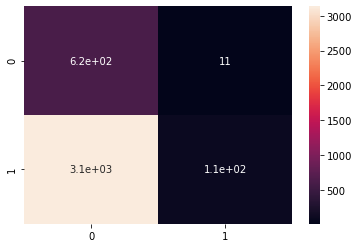

In [25]:
#naive bayes
clf = GaussianNB()
clf.fit(X_train, y_train)
pred=clf.predict(X_test)
print("GaussianNB accuracy_score ",accuracy_score(y_test, pred)*100)

cm = confusion_matrix(y_test,pred)
sns.heatmap(cm,annot=True)

print(classification_report(y_test,pred))

MultinomialNB accuracy_score 82.87264272797727
              precision    recall  f1-score   support

           0       0.28      0.04      0.06       628
           1       0.84      0.98      0.91      3243

    accuracy                           0.83      3871
   macro avg       0.56      0.51      0.49      3871
weighted avg       0.75      0.83      0.77      3871



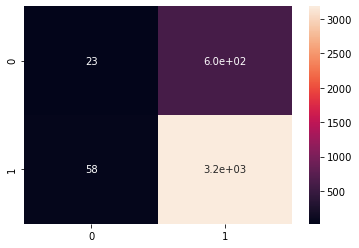

In [26]:
# naive_bayes
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train,y_train)
y_predict_test = NB_classifier.predict(X_test)
print("MultinomialNB accuracy_score",accuracy_score(y_test, y_predict_test)*100)

cm = confusion_matrix(y_test,y_predict_test)
sns.heatmap(cm,annot=True)

print(classification_report(y_test,y_predict_test))

SVC accuracy_score 83.7768018599845
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       628
           1       0.84      1.00      0.91      3243

    accuracy                           0.84      3871
   macro avg       0.42      0.50      0.46      3871
weighted avg       0.70      0.84      0.76      3871



c:\users\pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


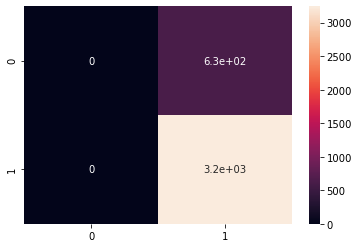

In [29]:
#SVC
clf = svm.SVC()
clf.fit(X_train, y_train)
pred=clf.predict(X_test)
print("SVC accuracy_score",accuracy_score(y_test, pred)*100)

cm = confusion_matrix(y_test,pred)
sns.heatmap(cm,annot=True)

print(classification_report(y_test,pred))

kernel SVC accuracy_score 83.7251356238698
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       628
           1       0.84      1.00      0.91      3243

    accuracy                           0.84      3871
   macro avg       0.42      0.50      0.46      3871
weighted avg       0.70      0.84      0.76      3871



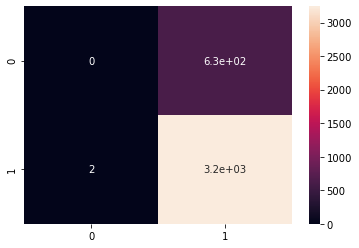

In [28]:
#kernel svc
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
pred=clf.predict(X_test)
print("kernel SVC accuracy_score",accuracy_score(y_test, pred)*100)

cm = confusion_matrix(y_test,pred)
sns.heatmap(cm,annot=True)

print(classification_report(y_test,pred))

c:\users\pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\pc\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LogisticRegression accuracy_score 83.7768018599845
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       628
           1       0.84      1.00      0.91      3243

    accuracy                           0.84      3871
   macro avg       0.42      0.50      0.46      3871
weighted avg       0.70      0.84      0.76      3871



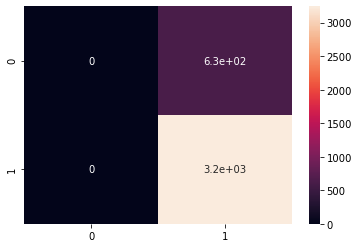

In [27]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
pred=logisticRegr.predict(X_test)
print("LogisticRegression accuracy_score",accuracy_score(y_test, pred)*100)

cm = confusion_matrix(y_test,pred)
sns.heatmap(cm,annot=True)

print(classification_report(y_test,pred))

# Imbalanced data
It is the problem in machine learning where the total number of a class of data (negative) is far less than the total number of another class of data (positive). This problem is extremely common in practice.

Keras with Scikit Learn